# Finding the minimum energy of the ground state of the 1D and 2D Quantum Harmonic Oscillator
## Janos Revesz, SN: 19111202
In the following jupyter notebook I use the bisection method and the scipy optimize function to find the lowest possible energy of the ground state solution for the quantum harmonic oscillator.



## 1D Quantum Harmonic Oscillator
The eigenvalue equation for the TISE:
$ H \Psi = E \Psi $
where $H$ is the Hamiltonian or energy operator.
  $$H = - \frac {1}{2} \frac {d^2}{d x^2}+\frac {1}{2} \omega^2 x^2$$
    
  Using atomic units $\hbar = m = 1$ and $\omega = 1 $
the ground state solution of the Quantum Harmonic Oscillator is:
$$ \psi = \left({\frac{2\alpha}{\pi}}\right)^{1/4} e^{-\alpha x^2}$$
  

  
And the energy level belonging to this ground state:
$$ E = \frac{\alpha}{2}+\frac{1}{8 \alpha}$$  
  
To find the minimum energy differentiate $E(\alpha)$ and look for when the function $\frac{dE}{d\alpha}=0$ using the bisections method.
  
$$ \frac{dE}{d\alpha}=\frac{1}{2} -\frac{1}{8} \alpha^{-2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize  

In [2]:
# implementing the bisection method
def bisection(fun,a,b,tol):
    """The bisection method finds the root of a function given the upper and lower bounds of an interval
    where we know a root lies.
    fun: the function which root we are looking for
    a: upper bound of the interval
    b: lower bound of the interval
    tol: how accurately the function needs to determine the root"""
    
    # Evaluate f(a) and f(b) the function values at the upper and lower brackets
    f_a = fun(a)
    f_b = fun(b)
    # Start the counter so the loop can't turn into a infinite loop
    counter = 0
    # If the interval get's smallet than the tolerance the function has found the root
    while abs(b-a)>tol:
        c = (a+b)/2
        f_c = fun(c)
        # Change the value of the upper or lower bracket to the midpoint
        if f_c*f_a>0: 
            a = c
            f_a = f_c
        else:
            b = c
            f_b = f_c
        # break if the counter equal a certain value
        if counter==40:
            break
        counter += 1
    print("Number of iterations: ",counter," root: ",c)
    # return the number of iteration and the root
    return (counter,c)

In [3]:
def QHO_E(alpha):
    """This function calculates the energy of the 1D quantum harmonic oscillators ground state
    given the parameter alpha
    alpha: the parameter that determines the energy
    """
    E = alpha/2 + 1/(8*alpha)
    return E

In [4]:
def QHO_grad(alpha):
    """This funciton calculates the gradient of the energy of the 1D quantum harmonic oscillator's ground state
    with regard to the parameter alpha
    alpha: the parameter that determines the gradient of the energy
    """
    gradE = 1/2-1/8*alpha**(-2)
    return gradE

Number of iterations:  40  root:  0.4999999999999091
Value is:  0.5


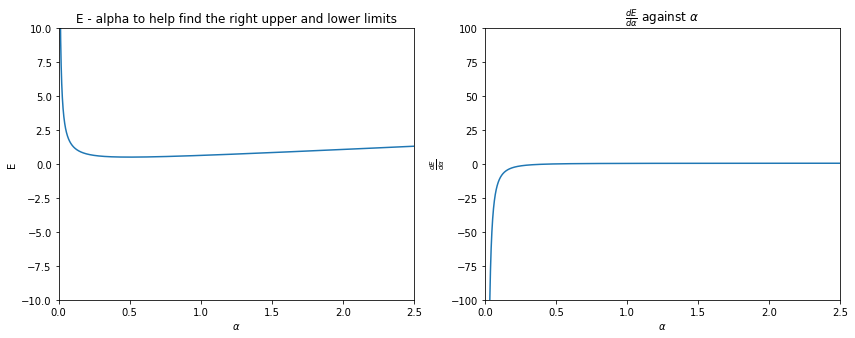

In [5]:
# Plotting
alpha = np.linspace(-2.5,2.5,10000)
alpha[5000]=np.nan
fig = plt.figure(figsize = (14,5))
# Plot the energy and alpha
ax1 = fig.add_subplot(1,2,1)
ax1.plot(alpha,QHO_E(alpha)) 
ax1.set_xlabel(r"$\alpha$")
ax1.set_ylabel('E')
ax1.set_ylim(-10,10)
ax1.set_xlim(0,2.5)
ax1.set_title("E - alpha to help find the right upper and lower limits")
# Plot the gradient of the energy and alpha
ax2 = fig.add_subplot(1,2,2)
ax2.plot(alpha,QHO_grad(alpha))
ax2.set_xlabel(r"$\alpha$")
ax2.set_ylabel(r"$\frac{dE}{d\alpha}$")
ax2.set_ylim(-100,100)
ax2.set_xlim(-0,2.5)
ax2.set_title(r"$\frac{dE}{d\alpha}$ against $\alpha$")

# Use the bisection function to find where the gradient of the energy equals 0
n, alpha = bisection(QHO_grad,0.1,1,1e-12)
print("Value is: ",QHO_E(alpha))

## 2D Quantum Harmonic Oscillator
For the 2D Quantum Harmonic Oscillator the energy level belonging to the ground state is:
  
$$ E = \frac{\alpha}{2}+\frac{1}{8 \alpha}+\frac{\beta}{2}+\frac{1}{8 \beta}$$  
and it's partial derivatives are: 
  
$$ \frac{\partial E}{\partial \alpha}=\frac{1}{2} -\frac{1}{8} \alpha^{-2}$$
  
$$ \frac{\partial E}{\partial \beta}=\frac{1}{2} -\frac{1}{8} \beta^{-2}$$
In the following code the minimum value of the ground state energy level is calculated.

In [6]:
def QHO_2D_grad(param):
    """ The function calculates the gradient of the energy of the 2D quantim harmonic oscillator's ground state
    given the parameters alpha and beta
    """
    alpha = param[0]
    beta = param[1]
    # partial derivative of the energy with respect to alpha
    dE_dalpha = 1/2-1/8*(alpha**(-2))
    # partial derivative of the energy with respect to beta
    dE_dbeta = 1/2-1/8*(beta**(-2))
    # return the two partial derivatives calculated in an array
    return np.array([dE_dalpha, dE_dbeta]) 

In [18]:
def QHO_2D_E(param):
        """This function calculates the energy of the 2D quantum harmonic oscillator's ground state
    given the parameters alpha and beta
    param: the parameters alpha and beta are passed to the function as an array"""
        alpha = param[0]
        beta = param[1]
        # calculate the energy
        E = alpha/2+1/(8*alpha)+beta/2+1/(8*beta)
        return E

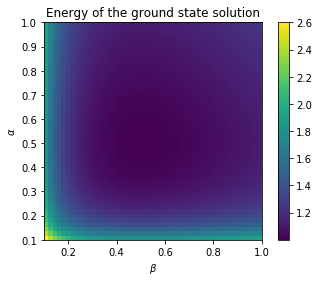

In [19]:
# plotting the 2D function
alpha = np.linspace(0.1,1)
beta = np.linspace(0.1,1)
alpha2D, beta2D = np.meshgrid(alpha,beta)
plt.imshow(QHO_2D_E([alpha2D,beta2D]),extent=(0.1,1,0.1,1),origin='lower')
plt.title("Energy of the ground state solution")
plt.ylabel(r"$\alpha$")
plt.xlabel(r"$\beta$")
plt.colorbar()

In [ ]:
# starting point for the optimize.minimize function
x0 = np.array([0.1, 1]) 
# save the results to the opt_results object
opt_result = optimize.minimize(QHO_2D_E, x0, method='CG', jac=QHO_2D_grad) 

In [ ]:
# print if the function was succesful
print(opt_result.success)
# where the minimum value is
print("Minimum is at: ",opt_result.x)
# what the minimum value is
print("Value is: ",QHO_2D_E(opt_result.x))
# how many iterations it took
print("Iters: ",opt_result.nit)

### Conclusions
How to solve algebraic equations with numerical methods in python.